In [1]:
import pandas as pd



# CLASIFICAZIONE BINARIA

In [2]:
# Caricare il dataset e applicare lo split
csv_file_path = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/features_extraction/audio_features.csv'

In [3]:
# Carica il file CSV in un DataFrame
df = pd.read_csv(csv_file_path)

In [4]:
df

,File Name,Class,Subclass,Spectral Centroid Mean,Spectral Bandwidth RMS,Standard Deviation,Skewness,Kurtosis,Shannon Entropy,Renyi Entropy,Rate of Attack,Rate of Decay,Threshold Crossings,Silence Ratio,Mean,Max Over Mean,Min Over Mean,Energy Measurements
0,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg1.wav,Non-Target,Ambient Noise,2585.774150,3545.441382,0.226857,0.290663,0.892096,4.972139,-5.535674,376.987654,0.003933,4596,0.611758,-0.034153,-21.482748,23.621908,0.052631
1,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg2.wav,Non-Target,Ambient Noise,3004.490961,3774.635411,0.108625,-0.005662,-0.569438,5.162510,-6.898534,388.414286,0.003898,4892,0.634714,-0.032923,-9.492707,10.171222,0.012883
2,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg3.wav,Non-Target,Ambient Noise,2374.518939,3489.082003,0.247894,-0.276421,0.685544,4.945729,-5.216699,354.935065,0.003911,2814,0.576922,-0.030692,-25.133602,32.582104,0.062393
3,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg4.wav,Non-Target,Ambient Noise,2821.144296,3698.989681,0.156887,0.579543,1.394184,4.977810,-6.245069,351.652174,0.003900,3842,0.676630,-0.033124,-17.890182,14.250049,0.025711
4,0f9867d8-fcf7-40d1-b846-3f7fb8100eb7_seg5.wav,Non-Target,Ambient Noise,2649.515257,3629.187032,0.182234,-0.088010,-0.083039,5.108433,-5.868417,360.301370,0.003938,4086,0.587979,-0.031081,-16.133920,20.697605,0.034175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50988,ship_small_seg5.wav,Target,Vessel,456.747011,797.837269,0.194804,0.013841,0.040806,4.912163,-5.505589,374.087500,0.004186,3257,0.502427,0.010898,67.170630,-71.718500,0.038067
50989,ship_small_seg6.wav,Target,Vessel,452.009912,804.062723,0.187102,0.015867,0.072808,4.923598,-5.597314,374.125000,0.004034,3284,0.499966,0.010380,68.853870,-69.641780,0.035115
50990,ship_small_seg7.wav,Target,Vessel,446.388360,808.959976,0.179071,0.000758,0.094906,4.904681,-5.670921,374.100000,0.003832,3247,0.500477,0.011149,60.261180,-65.437140,0.032191
50991,ship_small_seg8.wav,Target,Vessel,451.316540,794.817133,0.188441,-0.002943,0.136695,4.846811,-5.513616,374.087500,0.004043,3283,0.495841,0.010464,76.876610,-72.440750,0.035620


In [5]:
print("Distribuzione delle Classi prima dello split:")
print(df['Class'].value_counts())

Distribuzione delle Classi prima dello split:
Class
Target        43181
Non-Target     7812
Name: count, dtype: int64


In [6]:
df_Target = df[df['Class'] == 'Target']

print("Distribuzione delle subclass in Target prima dello split:")
print(df_Target['Subclass'].value_counts())

Distribuzione delle subclass in Target prima dello split:
Subclass
Passengership                       11728
Tanker                              11221
Tug                                 10162
Cargo                                9671
Vessel                                307
Sonar                                  20
Seismic airguns surveys                18
Seal bomb                              17
Echosounder                            14
Underwater Communication Signals        6
Scuba divers                            4
Seafloor fossil fuel processing         4
Acoustic release                        3
Explosion                               2
Acoustic Harassment Devices             2
Fishing pinger                          2
Name: count, dtype: int64


In [7]:
df_NonTarget = df[df['Class'] == 'Non-Target']

print("Distribuzione delle subclass in Non-Target prima dello split:")
print(df_NonTarget['Subclass'].value_counts())

Distribuzione delle subclass in Non-Target prima dello split:
Subclass
Humpback Whale                1523
Sperm Whale                   1107
Fin, Finback Whale             803
Pygmy Blue Whale               493
Blue whale                     280
                              ... 
Sea lion                         2
Australian Snubfin Dolphin       1
Harbor porpoise                  1
Pygmy Right Whale                1
True_s beaked whale              1
Name: count, Length: 96, dtype: int64


### Filtro dataframe

In [8]:
df['File Name'] = df['File Name'].str[:-4]
# Aggiungi una colonna "Parent" che contiene il prefisso del file per mantenere i segmenti coesi
df['Parent'] = df['File Name'].str.extract(r'^(.*?)(?=_seg)')

# Filtra subclass con almeno 10 parent distinti
parent_counts = df.groupby('Subclass')['Parent'].nunique()
subclasses_to_keep = parent_counts[parent_counts >= 10].index
df = df[df['Subclass'].isin(subclasses_to_keep)].copy()

print(f"Dimensione totale dopo il filtraggio: {df.shape[0]} campioni")

Dimensione totale dopo il filtraggio: 49429 campioni


## SPLIT

In [9]:
from oversampling_training.oversampling_binary import split_dataset

X_train_imputed, X_val_imputed, X_test_imputed, y_train, y_val, y_test = split_dataset(df)


Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle classi nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle classi nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle classi nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [10]:
X_train_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                                count   
Parent                               File Name                                          
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12     1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13     1   
...                                                                               ...   
ship_small                           ship_small_seg5                                1   
                                     ship_small_seg6                                1   
                                     ship_small_seg7                                1   
                                     ship_small_seg8                                1   
                                     ship_small_seg9                                1   

                                                                                        \
                                                                                unique   
Parent                               File Name                                           
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1       1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12      1   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13      1   
...                                                                                ...   
ship_small                           ship_small_seg5                                 1   
                                     ship_small_seg6                                 1   
                                     ship_small_seg7                                 1   
                                     ship_small_seg8                                 1   
                                     ship_small_seg9                                 1   

                                                                                         \
                                                                                    top   
Parent                               File Name                                            
1cc5583b-fe72-4cb2-b64c-563bd87ad91b 1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg1   Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg10  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg11  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg12  Target   
                                     1cc5583b-fe72-4cb2-b64c-563bd87ad91b_seg13  Target   
...                                                                                 ...   
ship_small                           ship_small_seg5                             Target   
                                     ship_small_seg6                             Target   
                                     ship_small_seg7                             Target   
                                     ship_small_seg8                             Target   
                                     ship_small_seg9                             Target   

                                                                                      
                                                                                freq  
Parent                               File Name                                        
1cc5583b-fe72-4cb2-b64c-563bd87ad91b

In [11]:
X_val_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                                                    count   
Parent                                           File Name                                                  
20160531-7_142749                                20160531-7_142749_seg1                                 1   
                                                 20160531-7_142749_seg10                                1   
                                                 20160531-7_142749_seg100                               1   
                                                 20160531-7_142749_seg101                               1   
                                                 20160531-7_142749_seg102                               1   
...                                                                                                   ...   
Striped-Dolphin-Whistles-PAM_20160206_015539_377 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...     1   

                                                                                                            \
                                                                                                    unique   
Parent                                           File Name                                                   
20160531-7_142749                                20160531-7_142749_seg1                                  1   
                                                 20160531-7_142749_seg10                                 1   
                                                 20160531-7_142749_seg100                                1   
                                                 20160531-7_142749_seg101                                1   
                                                 20160531-7_142749_seg102                                1   
...                                                                                                    ...   
Striped-Dolphin-Whistles-PAM_20160206_015539_377 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   
                                                 Striped-Dolphin-Whistles-PAM_20160206_015539_37...      1   

                                                                                                                 \
                                                                                                            top   
Parent                                           File Name                                                        
20160531-7_142749                                20160531-7_142749_seg1                                  Target   
                                                 20160531-7_142749_seg10                                 Target   
                                                 20160531-7_142749_seg100                                Target   
                                                 20160531-7_142749_seg101                                Target   
                                                 20160531-7_142749_seg102                                Target   
...                                                                                                         ... 

In [12]:
X_test_imputed[['File Name', 'Parent', 'Class']].groupby(['Parent', 'File Name']).describe()

Class  \
                                                                               count   
Parent                               File Name                                         
20160516a-9_9                        20160516a-9_9_seg1                            1   
                                     20160516a-9_9_seg2                            1   
                                     20160516a-9_9_seg3                            1   
20160616b-21_200904                  20160616b-21_200904_seg1                      1   
                                     20160616b-21_200904_seg10                     1   
...                                                                              ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8     1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9     1   

                                                                                       \
                                                                               unique   
Parent                               File Name                                          
20160516a-9_9                        20160516a-9_9_seg1                             1   
                                     20160516a-9_9_seg2                             1   
                                     20160516a-9_9_seg3                             1   
20160616b-21_200904                  20160616b-21_200904_seg1                       1   
                                     20160616b-21_200904_seg10                      1   
...                                                                               ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8      1   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9      1   

                                                                                            \
                                                                                       top   
Parent                               File Name                                               
20160516a-9_9                        20160516a-9_9_seg1                             Target   
                                     20160516a-9_9_seg2                             Target   
                                     20160516a-9_9_seg3                             Target   
20160616b-21_200904                  20160616b-21_200904_seg1                       Target   
                                     20160616b-21_200904_seg10                      Target   
...                                                                                    ...   
e60488c2-30fb-414b-bc9f-ee16f886a897 e60488c2-30fb-414b-bc9f-ee16f886a897_seg5  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg6  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg7  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg8  Non-Target   
                                     e60488c2-30fb-414b-bc9f-ee16f886a897_seg9  Non-Target   

                                                                                     
                                                                               freq  
Parent                               File Name                                       
20160516a-9_9           

## SMOTE

In [13]:
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

Bilanciamento dei dati con la nuova funzione SMOTE con sottoclassi

In [14]:
from oversampling_training.oversampling_binary import apply_smote_binary

X_train_resampled, y_train_resampled = apply_smote_binary(
    X_train_imputed,
    y_train,
    k_neighbors=1
)

In [15]:
# Stampare le forme dei dataset
print("\nForme dei dataset:")
print(f"Train: {X_train_imputed.shape}") # validation
print(f"Validation: {X_val_imputed.shape}") # validation
print(f"Test: {X_test_imputed.shape}") # test
print(f"Train bilanciato e filtrato: {X_train_resampled.shape}") # train dopo SMOTE


Forme dei dataset:
Train: (38789, 19)
Validation: (5016, 19)
Test: (5624, 19)
Train bilanciato e filtrato: (67744, 15)


# Esperimento 1

Esperimento effettuato prendendo come riferimento alcune features numeriche da "Malfante et al."

In [16]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed = X_val_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed = X_test_imputed.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 1.1 Random Forest Model

In [17]:
from oversampling_training.oversampling_binary import train_random_forest
from oversampling_training.oversampling_binary import rf_plot_confusion_matrices

In [18]:
random_forest_model = train_random_forest(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Accuratezza sul Validation Set: 0.9918
Log Loss sul Validation Set: 0.0384

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0     0.9387    0.9984    0.9676       613
           1     0.9998    0.9909    0.9953      4403

    accuracy                         0.9918      5016
   macro avg     0.9692    0.9946    0.9815      5016
weighted avg     0.9923    0.9918    0.9919      5016

Accuratezza sul Test Set: 0.9844
Log Loss sul Test Set: 0.0452

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0     0.9370    0.9556    0.9462       810
           1     0.9925    0.9892    0.9908      4814

    accuracy                         0.9844      5624
   macro avg     0.9648    0.9724    0.9685      5624
weighted avg     0.9845    0.9844    0.9844      5624



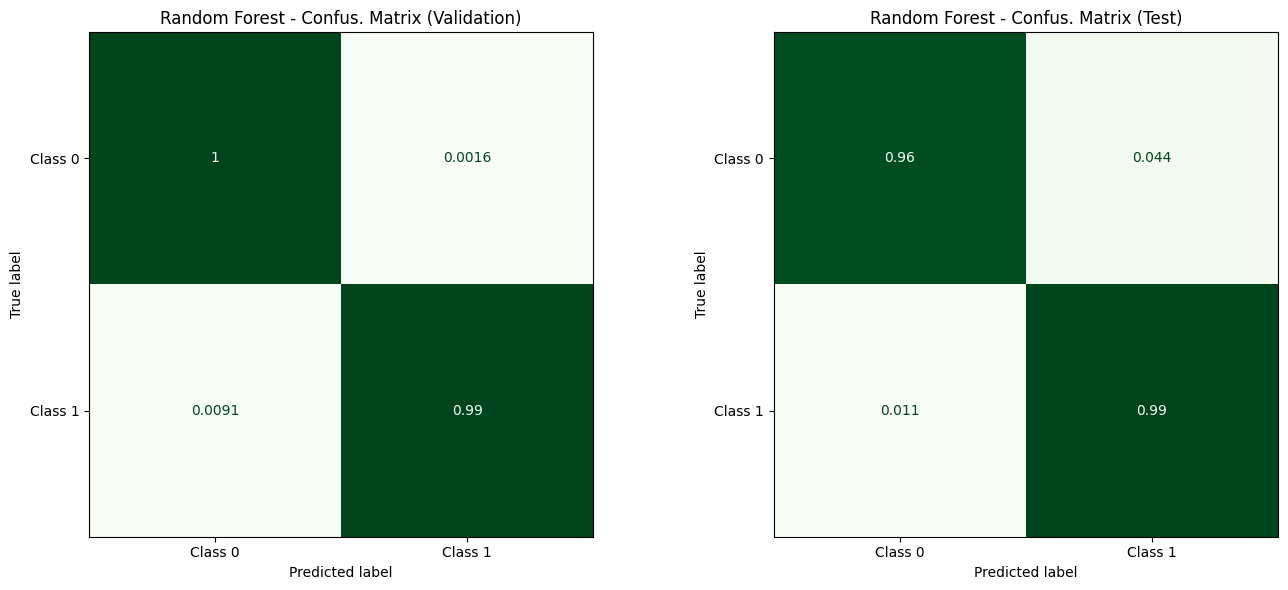

In [21]:
rf_plot_confusion_matrices(random_forest_model, X_val_imputed, y_val, X_test_imputed, y_test)

### 1.2 SVM Model

In [22]:
from oversampling_training.oversampling_binary import train_svm
from oversampling_training.oversampling_binary import svm_plot_confusion_matrices

In [23]:
svm_model = train_svm(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 390 4626]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.7026    0.4470    0.5464       613
           1     0.9267    0.9737    0.9496      4403

    accuracy                         0.9093      5016
   macro avg     0.8146    0.7103    0.7480      5016
weighted avg     0.8993    0.9093    0.9003      5016

Accuratezza sul set di validazione: 0.9093
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [ 873 4751]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.6976    0.7519    0.7237       810
           1     0.9577    0.9452    0.9514      4814

    accuracy                         0.9173      5624
   macro avg     0.8276    0.8485    0.8375      56

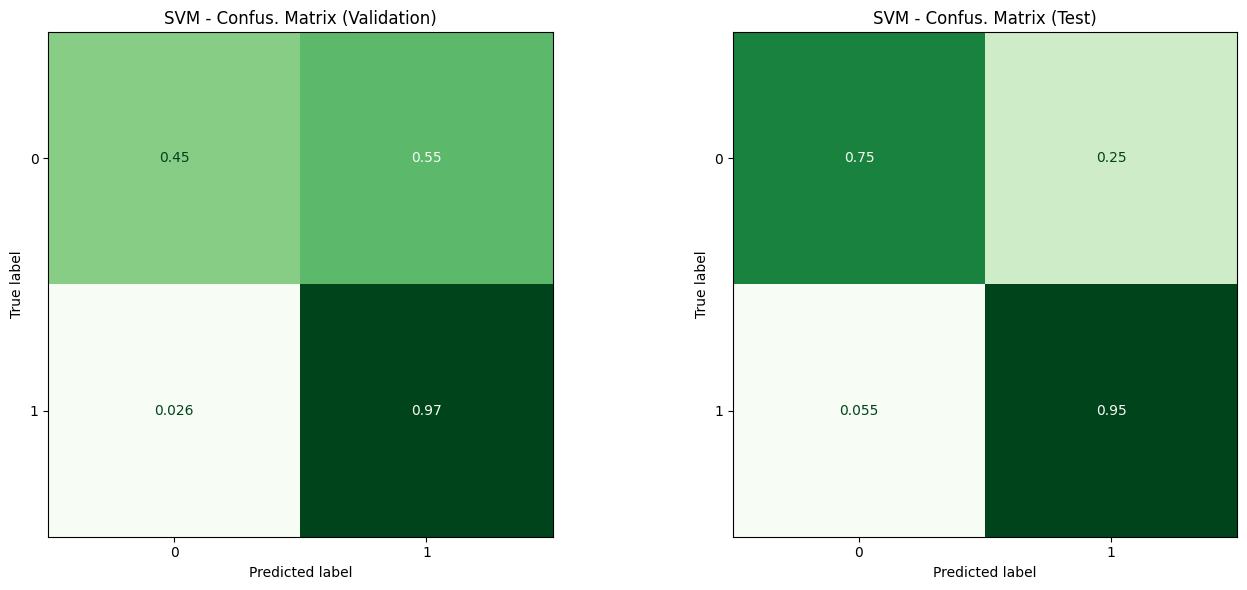

In [24]:
svm_plot_confusion_matrices(svm_model, X_val_imputed, y_val, X_test_imputed, y_test)

### 1.3 LightGBM Model

In [25]:
from oversampling_training.oversampling_binary import train_lightgbm
from oversampling_training.oversampling_binary import lightgbm_plot_confusion_matrices

In [26]:
lightgbm_model = train_lightgbm(X_train_resampled, y_train_resampled, X_val_imputed, y_val, X_test_imputed, y_test)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 15), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 15), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 15), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.9444    0.9984    0.9707       613
           1     0.9998    0.9918    0.9958      4403

    accuracy                         0.9926      5016
   macro avg     0.9721    0.9951    0.9832      5016
weighted avg     0.9930    0.9926    0.9927      5016

Accuratezza sul set di validazione: 0.9926
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.9773    0.9568    0.9669       810
           1     0.9928    0.9963    0.9945      4814

    accuracy                  

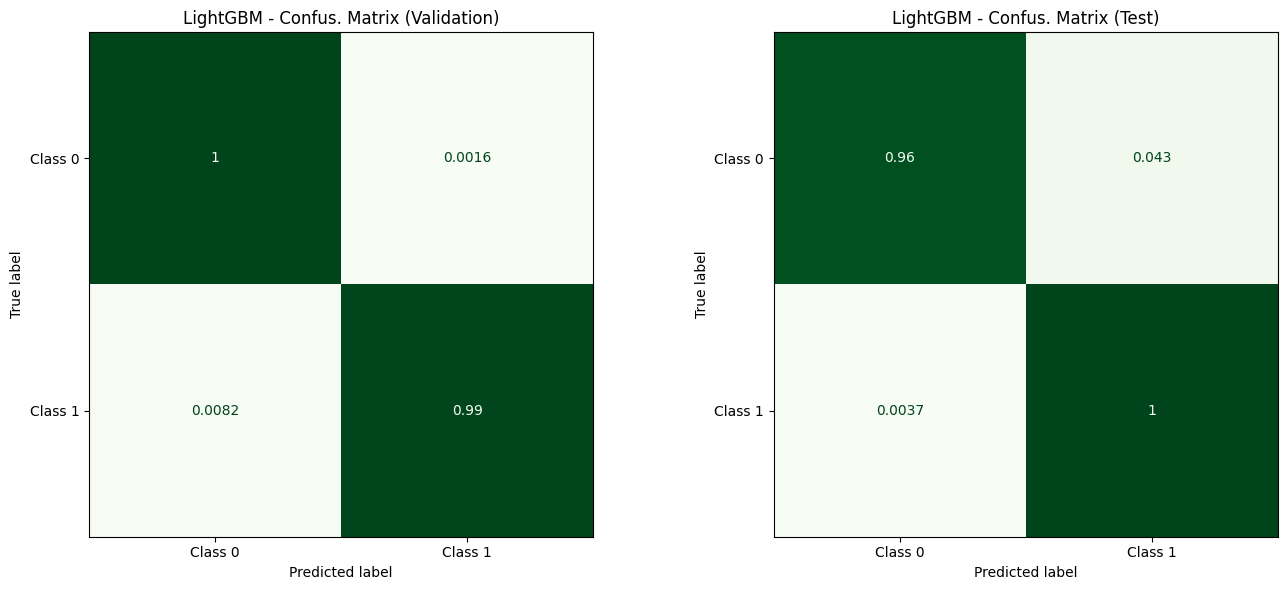

In [27]:
lightgbm_plot_confusion_matrices(lightgbm_model, X_val_imputed, y_val, X_test_imputed, y_test)

## Esperimento 2

Esperimento effettuato prendendo come riferimento alcune features numeriche da “BirdNet”

In [28]:
csv_file_path_exp1 = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/features_extraction/exp1_audio_features.csv'
df_exp1 = pd.read_csv(csv_file_path_exp1)

In [29]:
df_exp1['File Name'] = df_exp1['File Name'].str[:-4]
# Aggiungi una colonna "Parent" che contiene il prefisso del file per mantenere i segmenti coesi
df_exp1['Parent'] = df_exp1['File Name'].str.extract(r'^(.*?)(?=_seg)')

# Filtra subclass con almeno 10 parent distinti
parent_counts = df_exp1.groupby('Subclass')['Parent'].nunique()
subclasses_to_keep = parent_counts[parent_counts >= 10].index
df_exp1 = df_exp1[df_exp1['Subclass'].isin(subclasses_to_keep)].copy()

print(f"Dimensione totale dopo il filtraggio: {df_exp1.shape[0]} campioni")

Dimensione totale dopo il filtraggio: 49429 campioni


In [30]:
X_train_imputed_exp1, X_val_imputed_exp1, X_test_imputed_exp1, y_train_encoded_exp1, y_val_encoded_exp1, y_test_encoded_exp1 = split_dataset(df_exp1)


Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle classi nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle classi nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle classi nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [31]:

X_train_resampled_exp1, y_train_resampled_exp1 = apply_smote_binary(
    X_train_imputed_exp1,
    y_train_encoded_exp1,
    k_neighbors=1
)

In [32]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp1 = X_val_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp1 = X_test_imputed_exp1.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 2.1 Random Forest Model

In [33]:
random_forest_model_exp1 = train_random_forest(
    X_train_resampled_exp1,
    y_train_resampled_exp1,
    X_val_imputed_exp1,
    y_val_encoded_exp1,
    X_test_imputed_exp1,
    y_test_encoded_exp1
)

Accuratezza sul Validation Set: 0.9878
Log Loss sul Validation Set: 0.0436

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0     0.9119    0.9967    0.9525       613
           1     0.9995    0.9866    0.9930      4403

    accuracy                         0.9878      5016
   macro avg     0.9557    0.9917    0.9727      5016
weighted avg     0.9888    0.9878    0.9881      5016

Accuratezza sul Test Set: 0.9899
Log Loss sul Test Set: 0.0398

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0     0.9456    0.9864    0.9656       810
           1     0.9977    0.9904    0.9941      4814

    accuracy                         0.9899      5624
   macro avg     0.9716    0.9884    0.9798      5624
weighted avg     0.9902    0.9899    0.9900      5624



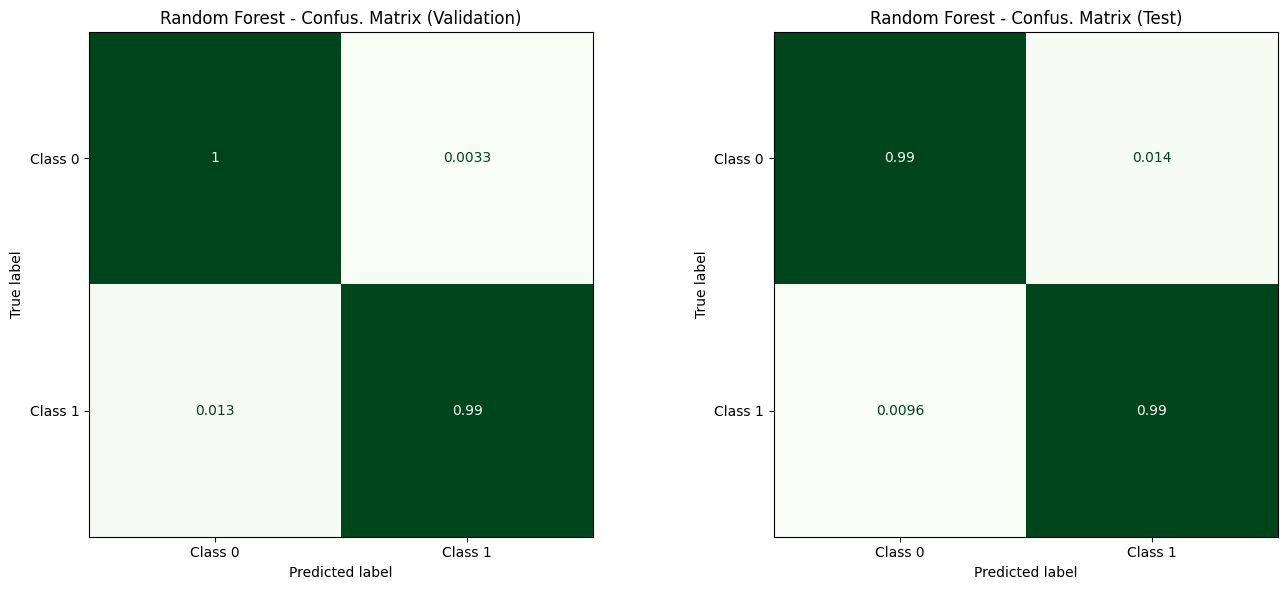

In [34]:
rf_plot_confusion_matrices(
    random_forest_model_exp1,
    X_val_imputed_exp1,
    y_val_encoded_exp1,
    X_test_imputed_exp1,
    y_test_encoded_exp1
)

### 2.2 SVM Model

In [35]:
svm_model_exp1 = train_svm(
    X_train_resampled_exp1,
    y_train_resampled_exp1,
    X_val_imputed_exp1,
    y_val_encoded_exp1,
    X_test_imputed_exp1,
    y_test_encoded_exp1
)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 688 4328]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.8706    0.9772    0.9208       613
           1     0.9968    0.9798    0.9882      4403

    accuracy                         0.9795      5016
   macro avg     0.9337    0.9785    0.9545      5016
weighted avg     0.9814    0.9795    0.9800      5016

Accuratezza sul set di validazione: 0.9795
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [1006 4618]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.7833    0.9728    0.8678       810
           1     0.9952    0.9547    0.9746      4814

    accuracy                         0.9573      5624
   macro avg     0.8893    0.9638    0.9212      56

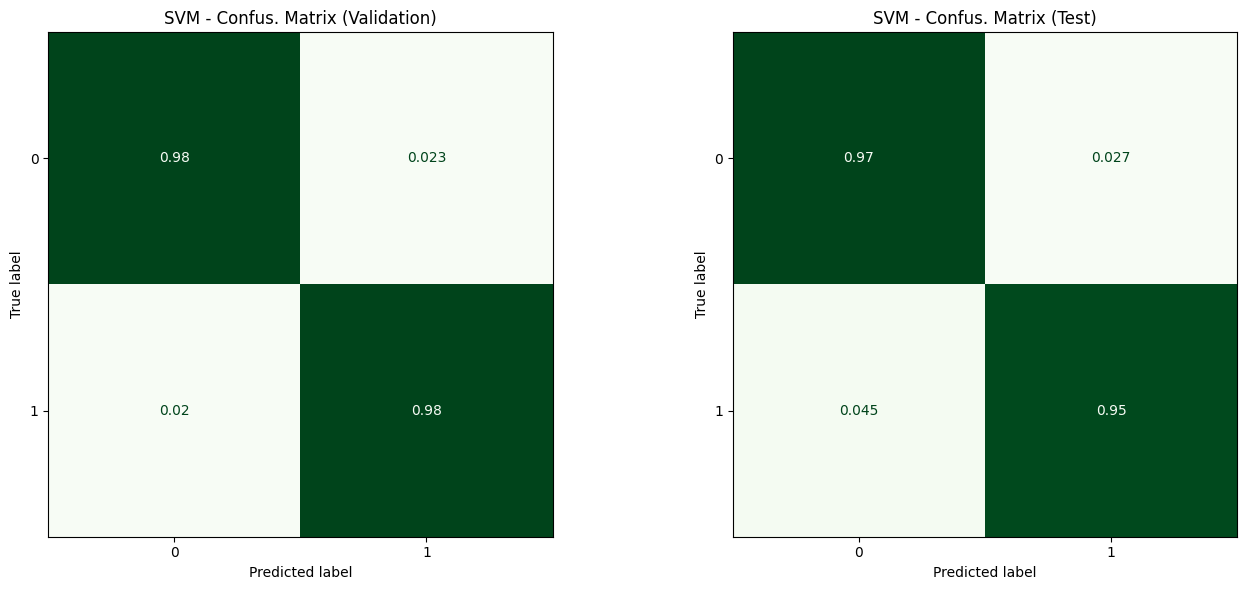

In [36]:
svm_plot_confusion_matrices(
    svm_model_exp1,
    X_val_imputed_exp1,
    y_val_encoded_exp1,
    X_test_imputed_exp1,
    y_test_encoded_exp1
)

### 2.3 LightGBM Model

In [37]:
lightgbm_model_exp1 = train_lightgbm(X_train_resampled_exp1, y_train_resampled_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 28), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 28), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 28), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.9562    0.9967    0.9760       613
           1     0.9995    0.9936    0.9966      4403

    accuracy                         0.9940      5016
   macro avg     0.9779    0.9952    0.9863      5016
weighted avg     0.9942    0.9940    0.9941      5016

Accuratezza sul set di validazione: 0.9940
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.9864    0.9827    0.9845       810
           1     0.9971    0.9977    0.9974      4814

    accuracy                  

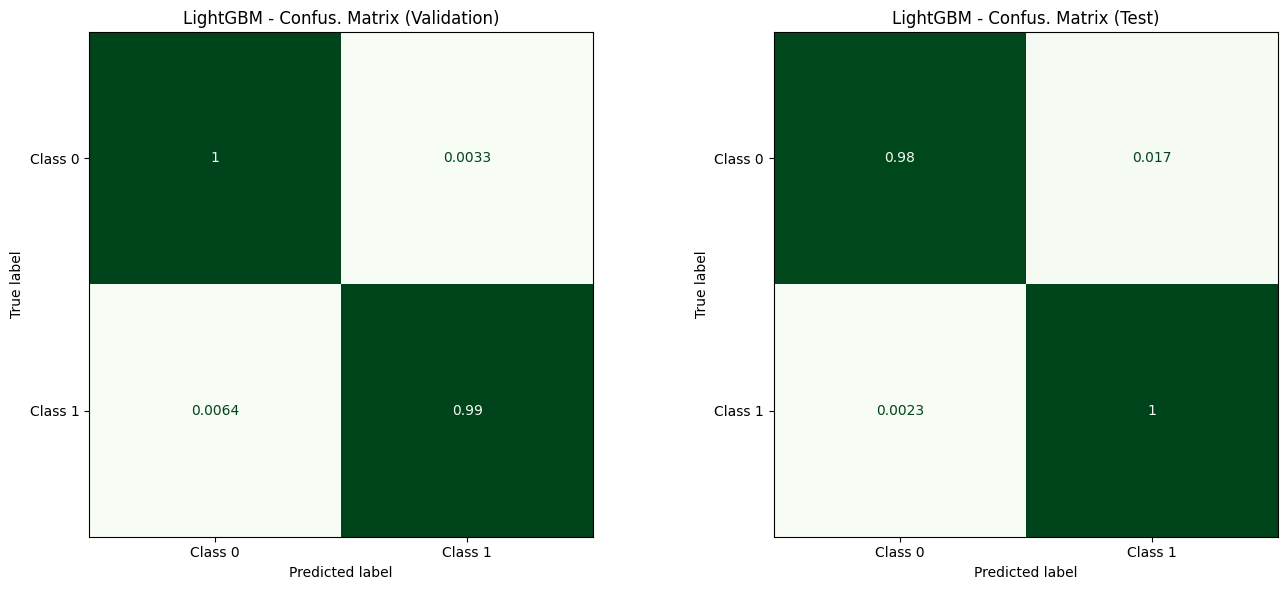

In [38]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp1, X_val_imputed_exp1, y_val_encoded_exp1, X_test_imputed_exp1, y_test_encoded_exp1)

## Esperimento 3

Esperimento effettuato prendendo come riferimento features numeriche da "A Survey on Audio Feature Extraction for Automatic Music Genre Classification" di Dhamodaran et al.

In [39]:
csv_file_path_exp2 = 'C:/Users/frees/Documents/GitHub/UnderwaterClassification/features_extraction/exp2_audio_features.csv'
df_exp2 = pd.read_csv(csv_file_path_exp2)

In [40]:
df_exp2['File Name'] = df_exp2['File Name'].str[:-4]
# Aggiungi una colonna "Parent" che contiene il prefisso del file per mantenere i segmenti coesi
df_exp2['Parent'] = df_exp2['File Name'].str.extract(r'^(.*?)(?=_seg)')

# Filtra subclass con almeno 10 parent distinti
parent_counts = df_exp2.groupby('Subclass')['Parent'].nunique()
subclasses_to_keep = parent_counts[parent_counts >= 10].index
df_exp2 = df_exp2[df_exp2['Subclass'].isin(subclasses_to_keep)].copy()

print(f"Dimensione totale dopo il filtraggio: {df_exp2.shape[0]} campioni")

Dimensione totale dopo il filtraggio: 49429 campioni


In [41]:
X_train_imputed_exp2, X_val_imputed_exp2, X_test_imputed_exp2, y_train_encoded_exp2, y_val_encoded_exp2, y_test_encoded_exp2 = split_dataset(df_exp2)


Dimensione del set di addestramento: 38789 campioni (78.47%)
Dimensione del set di validazione: 5016 campioni (10.15%)
Dimensione del set di test: 5624 campioni (11.38%)

Distribuzione delle classi nel set di addestramento:
Class
Target        33872
Non-Target     4917
Name: count, dtype: int64

Distribuzione delle classi nel set di validazione:
Class
Target        4403
Non-Target     613
Name: count, dtype: int64

Distribuzione delle classi nel set di test:
Class
Target        4814
Non-Target     810
Name: count, dtype: int64


In [42]:

X_train_resampled_exp2, y_train_resampled_exp2 = apply_smote_binary(X_train_imputed_exp2, y_train_encoded_exp2, k_neighbors=1)

In [43]:
# Rimuovi le colonne non necessarie per evitare errori nei nomi delle feature
X_val_imputed_exp2 = X_val_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')
X_test_imputed_exp2 = X_test_imputed_exp2.drop(columns=["Class", "File Name", "Parent", "Subclass"], errors='ignore')

### 3.1 Random Forest Model

In [44]:
random_forest_model_exp2 = train_random_forest(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Accuratezza sul Validation Set: 0.9848
Log Loss sul Validation Set: 0.0462

=== Report di Classificazione - Validation Set ===
              precision    recall  f1-score   support

           0     0.8920    0.9967    0.9414       613
           1     0.9995    0.9832    0.9913      4403

    accuracy                         0.9848      5016
   macro avg     0.9458    0.9900    0.9664      5016
weighted avg     0.9864    0.9848    0.9852      5016

Accuratezza sul Test Set: 0.9892
Log Loss sul Test Set: 0.0440

=== Report di Classificazione - Test Set ===
              precision    recall  f1-score   support

           0     0.9411    0.9864    0.9632       810
           1     0.9977    0.9896    0.9936      4814

    accuracy                         0.9892      5624
   macro avg     0.9694    0.9880    0.9784      5624
weighted avg     0.9895    0.9892    0.9893      5624



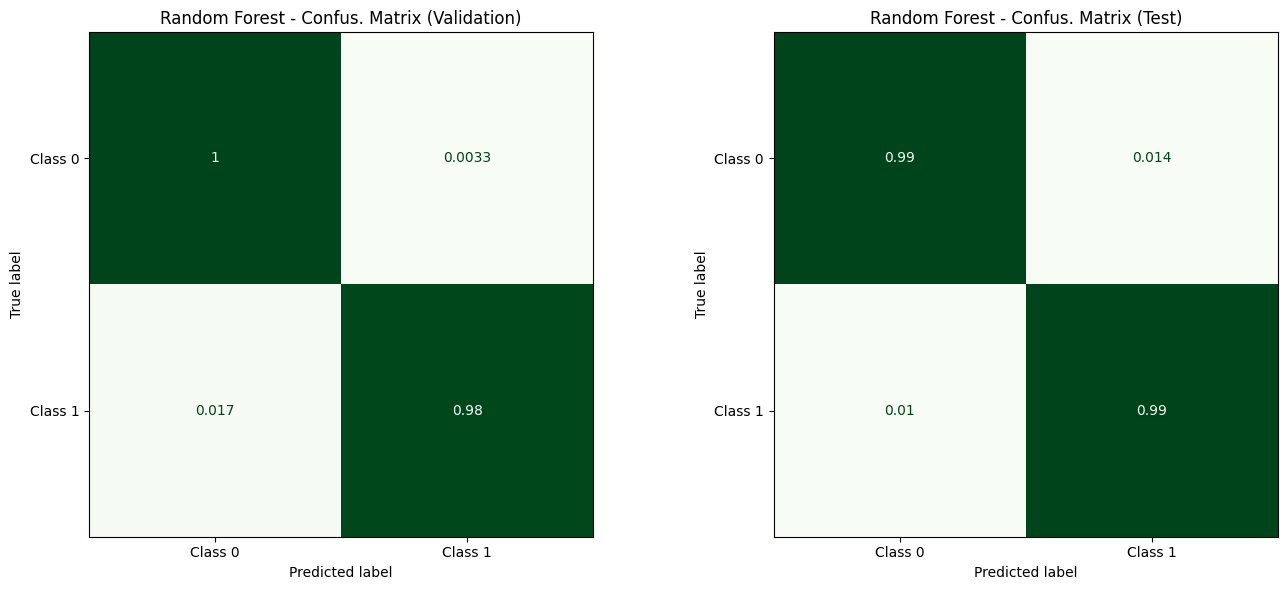

In [45]:
rf_plot_confusion_matrices(random_forest_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

### 3.2 SVM Model 

In [46]:
svm_model_exp2 = train_svm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Distribuzione delle classi reali nel set di validazione: [ 613 4403]
Distribuzione delle classi predette nel set di validazione: [ 672 4344]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.9048    0.9918    0.9463       613
           1     0.9988    0.9855    0.9921      4403

    accuracy                         0.9862      5016
   macro avg     0.9518    0.9887    0.9692      5016
weighted avg     0.9874    0.9862    0.9865      5016

Accuratezza sul set di validazione: 0.9862
Distribuzione delle classi reali nel set di test: [ 810 4814]
Distribuzione delle classi predette nel set di test: [ 851 4773]
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.9295    0.9765    0.9524       810
           1     0.9960    0.9875    0.9918      4814

    accuracy                         0.9860      5624
   macro avg     0.9628    0.9820    0.9721      56

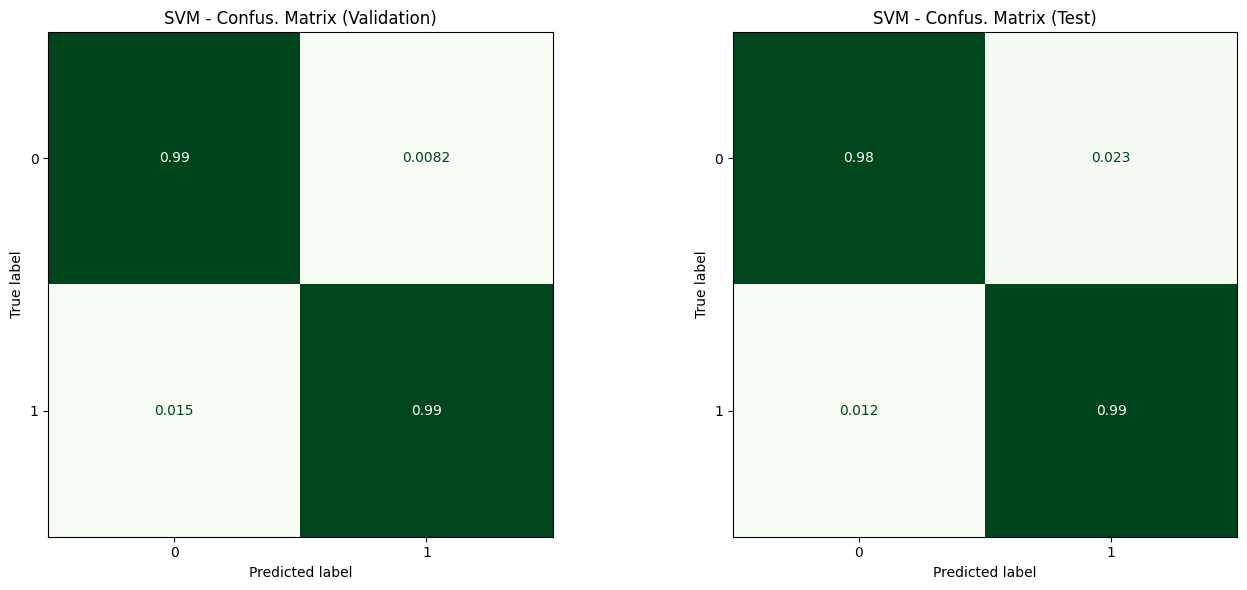

In [47]:
svm_plot_confusion_matrices(svm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

3.3 LightGBM Model

In [48]:
lightgbm_model_exp2 = train_lightgbm(X_train_resampled_exp2, y_train_resampled_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)

Dimensioni dopo NaN nel set di addestramento: X_train: (67744, 34), y_train: (67744,)
Dimensioni dopo NaN nel set di validazione: X_val: (5016, 34), y_val: (5016,)
Dimensioni dopo NaN nel set di test: X_test: (5624, 34), y_test: (5624,)
Classi nel set di addestramento: [0 1]
Classi nel set di validazione: [0 1]
Classi nel set di test: [0 1]
Report di classificazione del set di validazione:
              precision    recall  f1-score   support

           0     0.9371    0.9967    0.9660       613
           1     0.9995    0.9907    0.9951      4403

    accuracy                         0.9914      5016
   macro avg     0.9683    0.9937    0.9806      5016
weighted avg     0.9919    0.9914    0.9915      5016

Accuratezza sul set di validazione: 0.9914
Report di classificazione del set di test:
              precision    recall  f1-score   support

           0     0.9876    0.9864    0.9870       810
           1     0.9977    0.9979    0.9978      4814

    accuracy                  

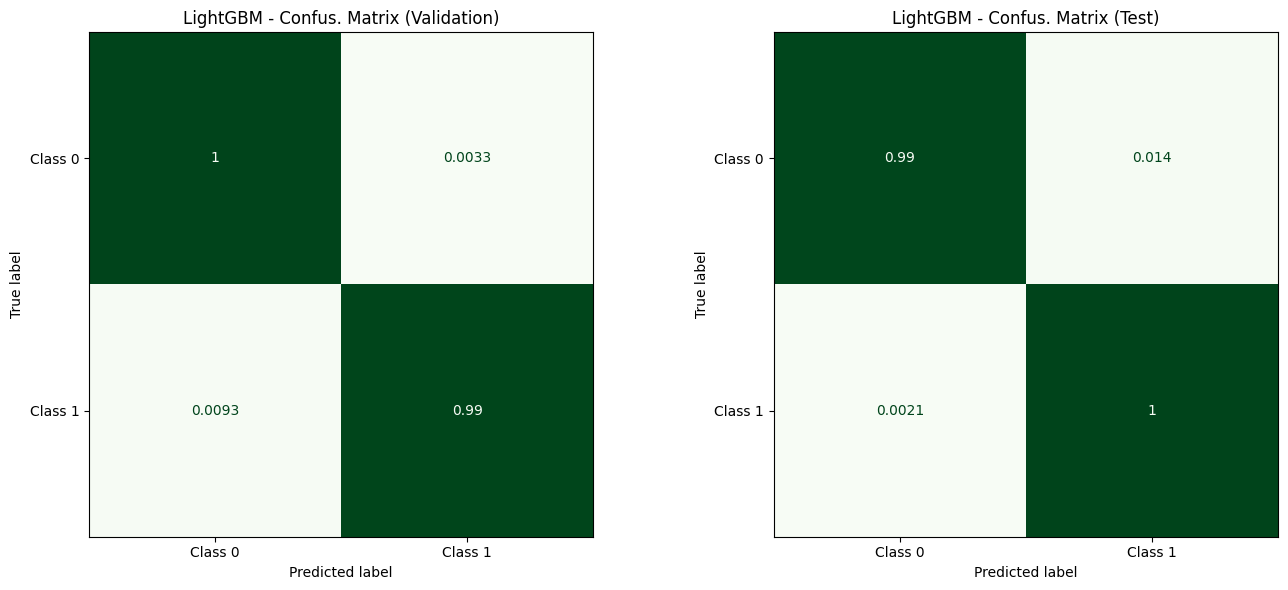

In [49]:
lightgbm_plot_confusion_matrices(lightgbm_model_exp2, X_val_imputed_exp2, y_val_encoded_exp2, X_test_imputed_exp2, y_test_encoded_exp2)